# **EDA**

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Change Matplotlib Default Parameter

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 5
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Project - Group 7/Colab Notebooks/car_prices.csv', error_bad_lines=False,warn_bad_lines=True)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## No. 1 Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [ ]:
df.isnull().sum().sort_values(ascending = False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
year                0
vin                 0
state               0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending = False)/len(df)*100

transmission    11.695010
body             2.361263
condition        2.110553
trim             1.906011
model            1.860915
make             1.843378
color            0.134035
interior         0.134035
odometer         0.016821
year             0.000000
vin              0.000000
state            0.000000
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

In [ ]:
nums = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cats = ['make', 'model', 'trim', 'body', 'transmission','vin','state','color','interior','seller','saledate']

In [ ]:
df.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
557893,2013,Audi,A4,2.0T Premium Plus quattro,Sedan,manual,wauhfafl9da078606,ga,3.2,32630.0,black,gray,sports & imports inc,23400,24000,Thu Jun 18 2015 03:00:00 GMT-0700 (PDT)
522946,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap0cm626340,fl,2.2,32625.0,black,black,nissan infiniti lt,18600,16600,Thu Jun 11 2015 02:15:00 GMT-0700 (PDT)
270,2013,Hyundai,Elantra,GLS,Sedan,automatic,5npdh4ae8dh375848,ca,3.8,38594.0,gray,gray,avis corporation,11350,11800,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
193095,2012,Nissan,Altima,2.5 S,Sedan,automatic,1n4al2ap9cn426673,fl,4.6,13060.0,white,tan,nissan-infiniti lt,13200,13000,Wed Feb 04 2015 01:00:00 GMT-0800 (PST)
258863,2009,Volkswagen,Jetta,S,Sedan,automatic,3vwjm71k39m018792,fl,2.8,62762.0,gray,gray,crown audi,6175,6600,Thu Feb 05 2015 01:50:00 GMT-0800 (PST)


In [ ]:
df[nums].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


**Pengamatan Numericals**:
1. Kolom `year`, `condition`, `odometer`,  tidak ada issue pada nilai min/max,
2. Semua kolom nilainya masih masuk akal
3. Kolom `year`, `condition`, `odometer`, `mmr`, `sellingprice` ada perbedaan antara mean dan median,
4. Kolom `mmr` masih butuh tinjauan lebih lanjut pada pre-processing karena nilai minimum rentangnya lumayan jauh dari mean dan median,
5. Terdapat anomali pada nilai minimum `sellingprice` dicurigai data tidak diketahui sehingga data diimputasi dengan nilai 1 atau mobil yang dijual berupa program perusahaan (hadiah).

In [ ]:
df[cats].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


**Pengamatan Categoricals**:
1. Kolom `transmission` didominasi oleh mobil dengan transmisi automatic (lebih dari 50%),
2. Kolom `vin`, `seller`, `saledate` memiliki kardinalitas yang tinggi (jumlah unique values tinggi),
3. Kolom `color` dan `interior` didominasi oleh mobil dengan warna exterior dan interior black (lebih dari 20%),
4. Kolom `make` didominasi oleh mobil dengan merk Ford (lebih dari 15%).

### Value Counting

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom make:
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: make, Length: 96, dtype: int64

Value count kolom model:
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: model, Length: 973, dtype: int64

Value count kolom trim:
Base                 55817
SE                   43648
LX                   20757
Limited              18356
LT                   16915
                     ...  
xls                      1
4x2 reg silverado        1
awd v8 limited           1
4x2 v6 limited           1
Power Wagon              1
Name: trim, Length: 1975, dtype: int64

Value count kolom body:
Sedan          199437
SUV            119292
seda

**Pengamatan Descriptive Statistics**:
- Data terdiri dari 558811 baris dan 16 kolom,
- Tidak ada issue pada nama dan isi setiap kolom,
- Tampak beberapa kolom masih memiliki null/missing values kolom `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`),
- Missing values terbesar berada pada kolom `transmission` sejumlah 65353 (11.7%) data,
- Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai).

### Duplicate, Unique, and Lowercase/Uppercase Values

In [ ]:
print(df[df.duplicated()].shape)
df.duplicated().any()

(0, 16)


False

Pada dataset ini tidak ada data yang memiliki nilai duplikat.

In [ ]:
# before lowercase data

len(df['make'].unique())

97

In [ ]:
# after lowercase data

df['make'] = df['make'].str.lower()
len(df['make'].unique())

67

Nilai unique data setelah dilakukan handling terhadap kolom `make` dari **97** menjadi **67**.

In [ ]:
# before lowercase data

len(df['model'].unique())

974

In [ ]:
# after lowercase data

df['model'] = df['model'].str.lower()
len(df['model'].unique())

852

Nilai unique data setelah dilakukan handling terhadap kolom `model` dari **974** menjadi **852**.

In [ ]:
# before lowercase data

len(df['body'].unique())

87

In [ ]:
# after lowercase data

df['body'] = df['body'].str.lower()
len(df['body'].unique())

46

Nilai unique data setelah dilakukan handling terhadap kolom `body` dari **87** menjadi **46**.

**Pengamatan Duplicate, Unique, dan Uppercase/Lowercase**:
- Ada perubahan unique data pada kolom `model`, `trim`, dan `body` setelah dilakukan handling pada uppercase dan lowercase,
- Kolom `transmission`, `vin`, `state`, `color`, `interior`, `seller`, dan `saledate` sudah memiliki data yang sesuai (tidak ada issue pada uppercase/lowercase),
- Kolom `year`, `condition`, `odometer`, `mmr`, dan `sellingprice` tidak perlu dilakukan pengecekan dikarenakan tipe data bersifat integer/boolean.

## No. 2 Univariate Analysis

### Box plots (Numericals)

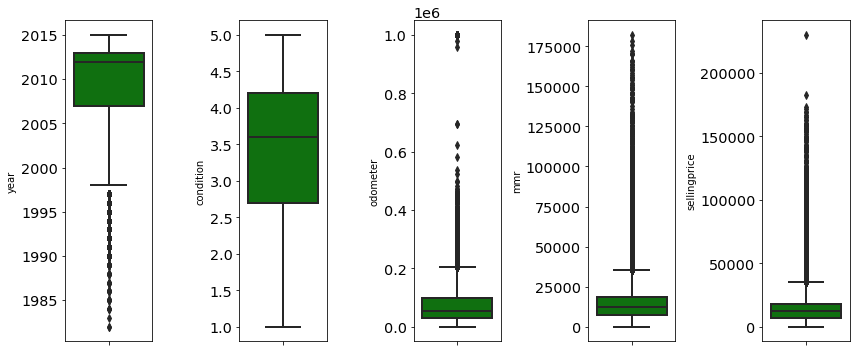

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

**Pengamatan Boxplot**:
- Dari box plot, outlier utamanya terlihat pada kolom `odometer` dan`sellingprice`,
- Kolom yang tampak memiliki distribusi lumayan skew juga terlihat pada `year`, `odometer`, `mmr`, `sellingprice`.

### Dist plots (Numericals)

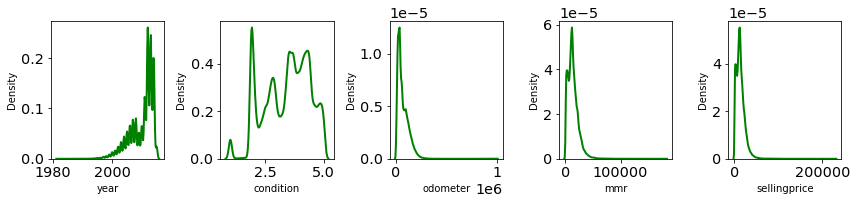

In [ ]:
for i in range(0, len(features)):
    plt.subplot(2, len(features), i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

**Pengamatan Distplot**:
- Seperti observasi pada box plot sebelumnya, kolom `year`, `mmr`, dan `sellingprice` memiliki distribusi yang skew terutama pada kolom `odometer`,
- Kolom `condition` memiliki arah distribusi multimodal dimana distribusinya sudah mendekati normal.

### Violin Plots (Numericals)

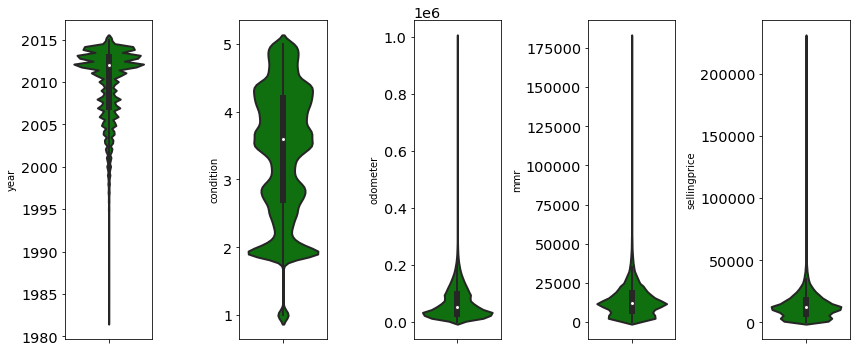

In [ ]:
for i in range(0, len(features)):
    plt.subplot(1, len(features), 1+i)
    sns.violinplot(y=df[features[i]], color = 'green', orient = 'v')
    plt.tight_layout()

### Count Plots (Categoricals)

In [ ]:
print(cats)

['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']


In [ ]:
cats_1 = ['make', 'model', 'trim', 'body', 'transmission']
cats_2 = ['vin', 'state', 'color', 'interior', 'seller', 'saledate']

#### make

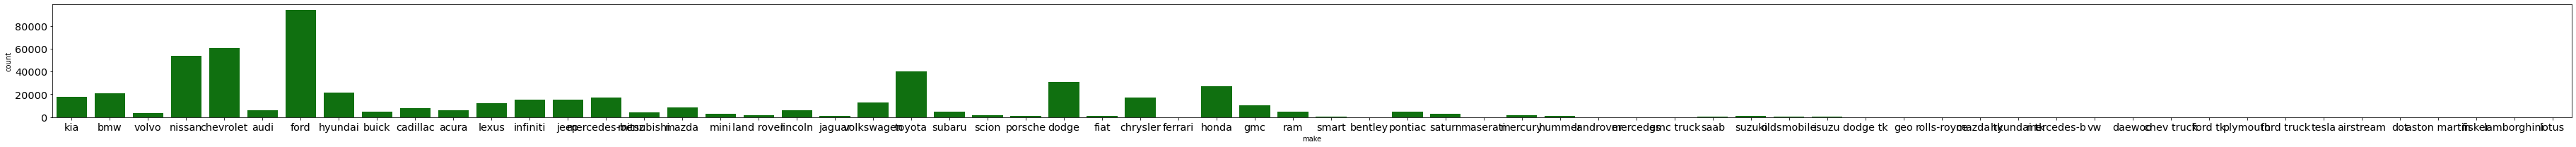

In [ ]:
plt.figure(figsize=(150, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['make'], color='green', orient='v')
plt.tight_layout();

#### model

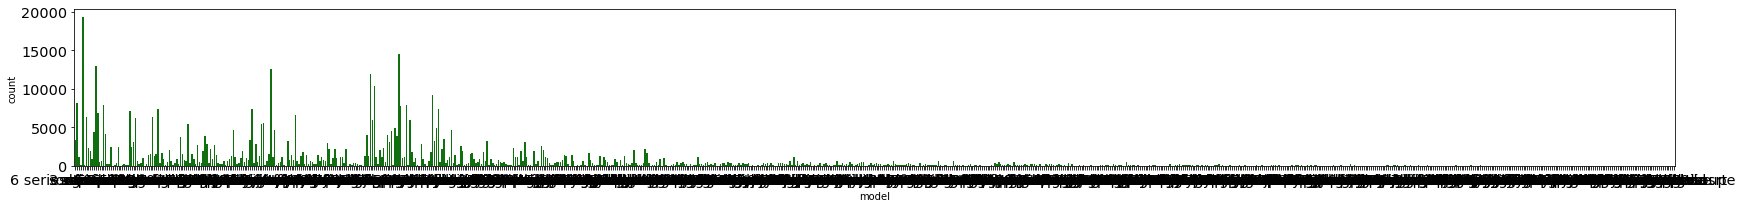

In [ ]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['model'], color='green', orient='v')
plt.tight_layout();

#### trim

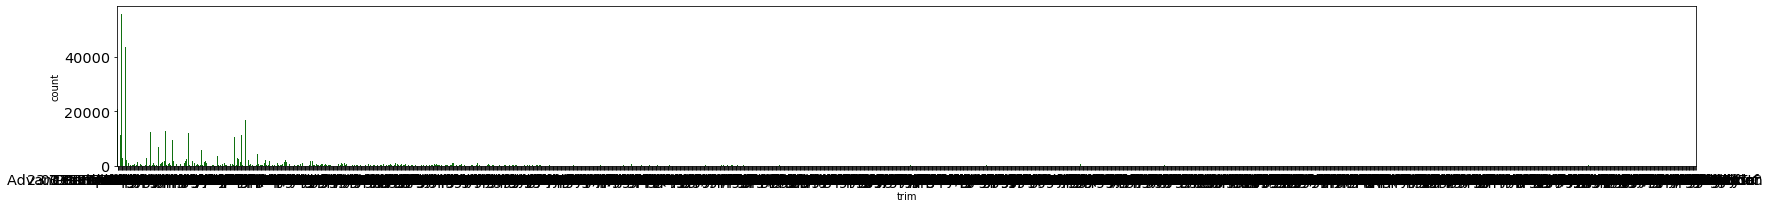

In [ ]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['trim'], color='green', orient='v')
plt.tight_layout();

#### body

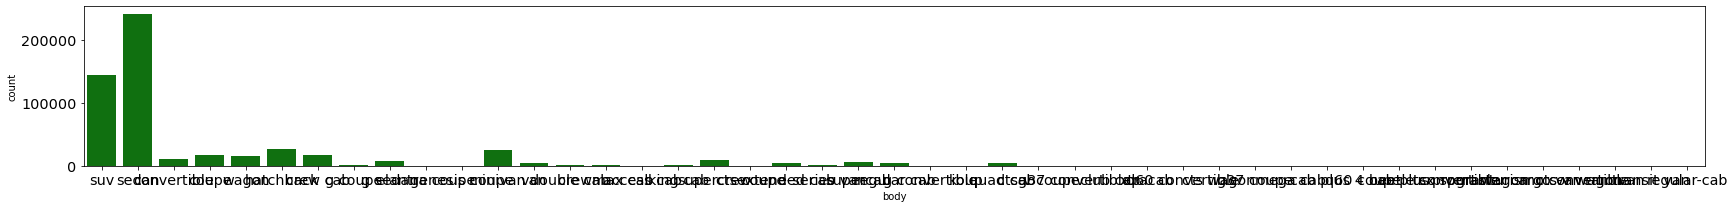

In [ ]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['body'], color='green', orient='v')
plt.tight_layout();

#### transmission

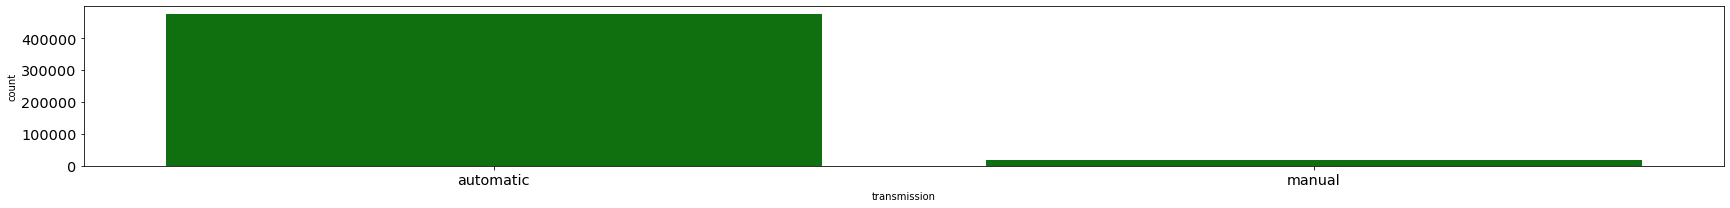

In [ ]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['transmission'], color='green', orient='v')
plt.tight_layout();

#### color

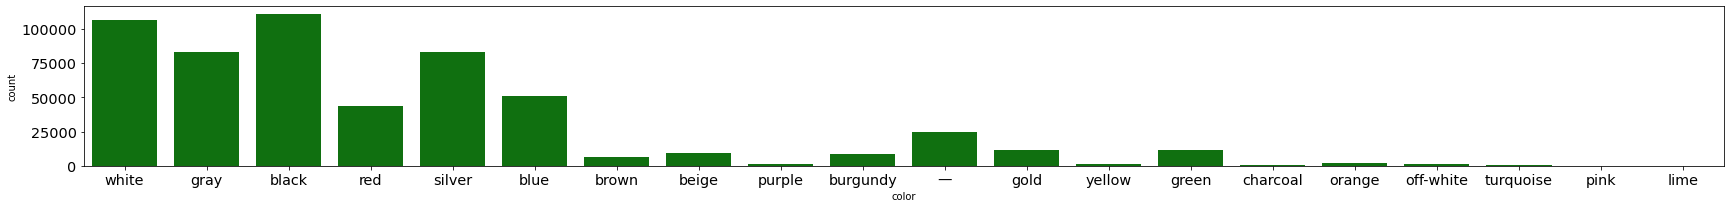

In [ ]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['color'], color='green', orient='v')
plt.tight_layout();

#### interior

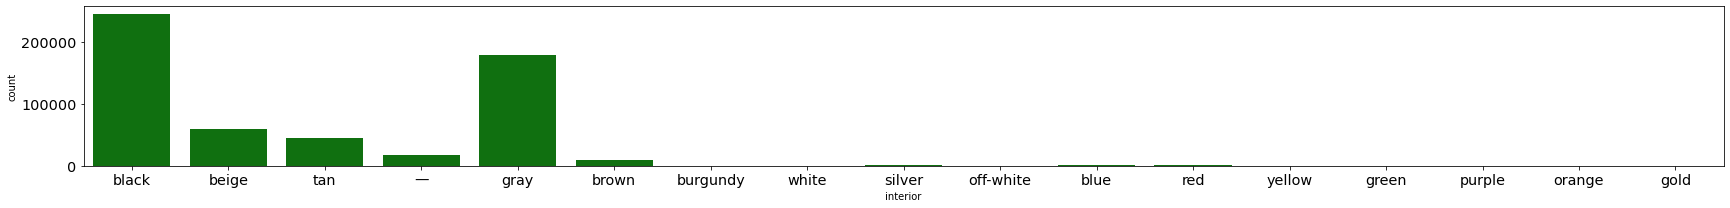

In [ ]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['interior'], color='green', orient='v')
plt.tight_layout();

`vin`, `seller`, `saledate` tidak ditampilkan karena memiliki unique values paling banyak.

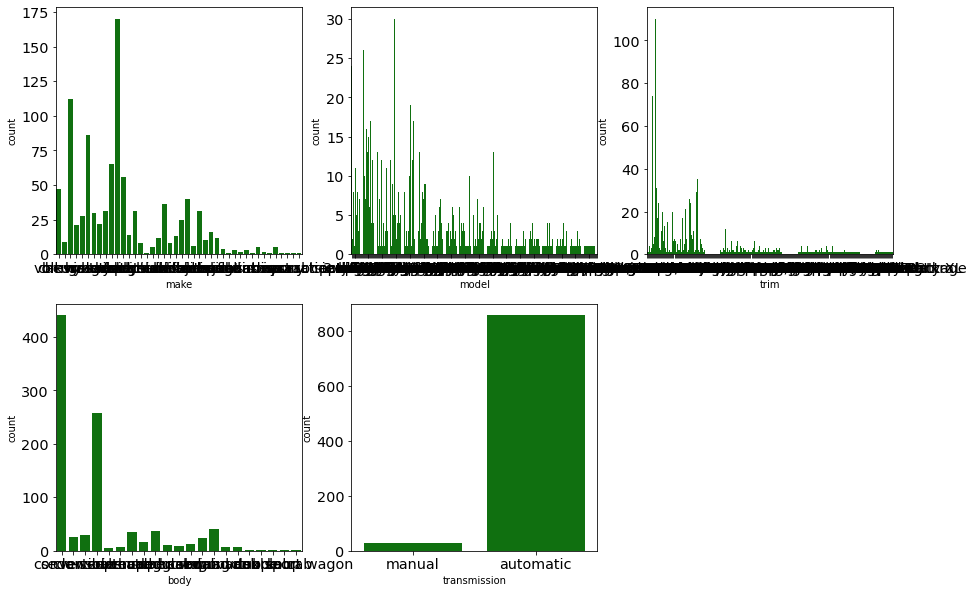

In [ ]:
df_sample = df.sample(1000, random_state = 123)
plt.figure(figsize=(15, 10))
for i in range(0, len(cats_1)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats_1[i]], color = 'green', orient = 'v')

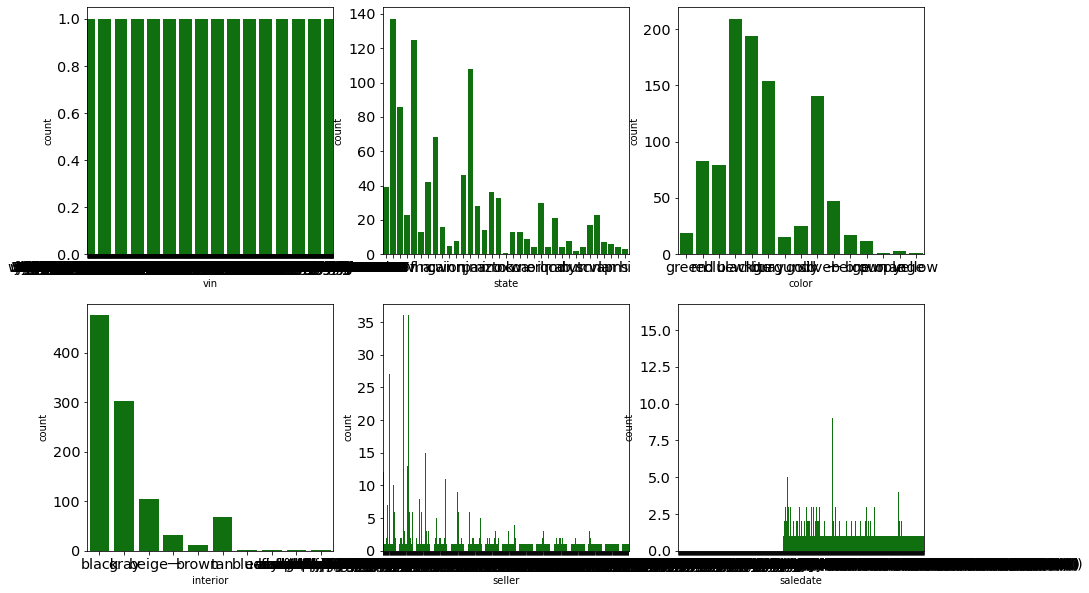

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0, len(cats_2)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats_2[i]], color = 'green', orient = 'v')

**Pengamatan Countplot**:
1. Kolom `make`, `model`, `trim`, `body`, `vin`, `state`, `color`, `interior`, dan `seller` memiliki kategori yang sangat banyak, sehingga perlu ditinjau kembali kembali kolom yang akan menjadi target dalam pemodelan,
2. Kolom `transmission` didominasi oleh automatic sesuai dengan pengamatan dengan menggunakan df.describe.

## No. 3 Multivariate Analysis

In [ ]:
df.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


### Correlation Heatmap

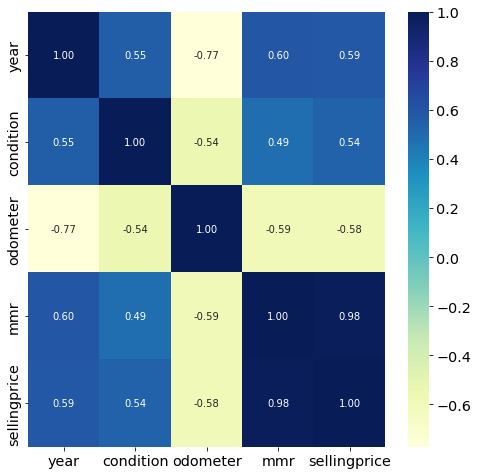

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f');

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target dari analisis ini adalah `sellingprice` dan memiliki korelasi positif sangat kuat dengan `mmr` (strong potential feature),
* Target `sellingprice` juga memiliki korelasi positif cukup tinggi dengan `year` dan `condition`, dan korelasi negatif dengan `odometer` (decent potential feature),
* `year` memiliki korelasi negatif cukup kuat dengan `odometer`. Ada kemungkinan kedua *feature* ini redundan (dapat dipilih salah satunya saja untuk training data).

### Pair Plot

<Figure size 1080x1080 with 0 Axes>

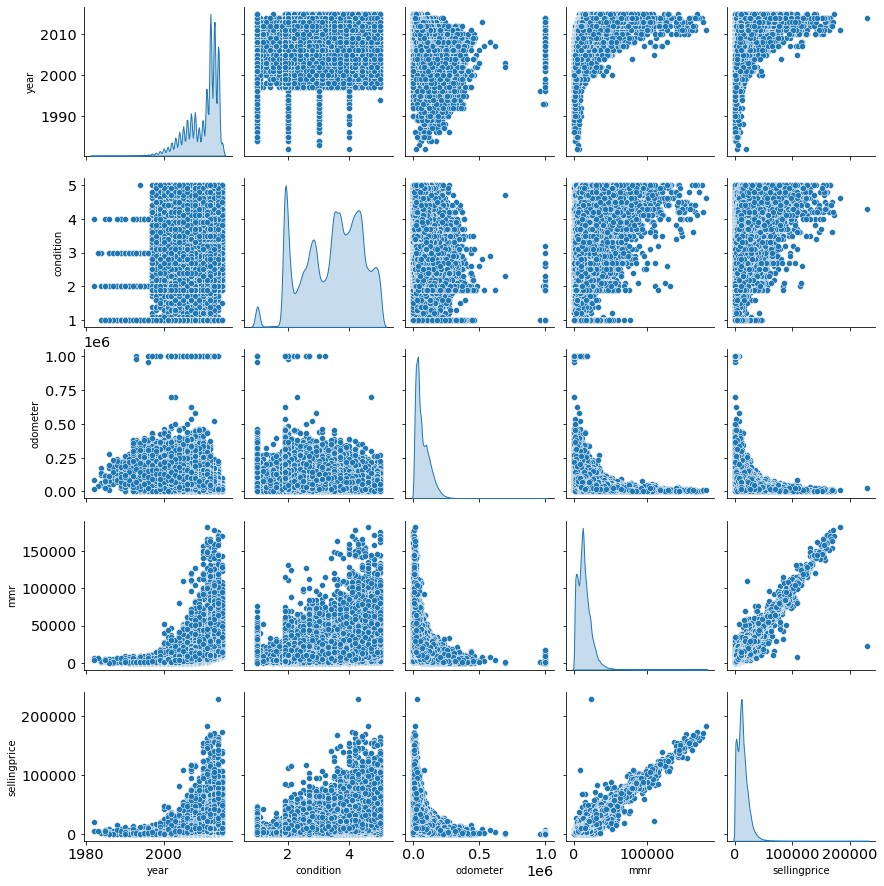

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde');

Dari pair plot di atas, kita juga dapat melilhat hal yang mirip:
* `mmr` jelas memiliki korelasi linear dengan `sellingprice`,
* `year` dan `odometer` jelas memiliki korelasi terbalik yang cukup kuat.

### Category Column vs Target Variable

In [ ]:
cats

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

#### Top 10 Used Car Sold (Brands)

In [ ]:
df['make'].value_counts().iloc[:10]

ford         93997
chevrolet    60587
nissan       54017
toyota       39966
dodge        30955
honda        27351
hyundai      21836
bmw          20793
kia          18084
chrysler     17485
Name: make, dtype: int64

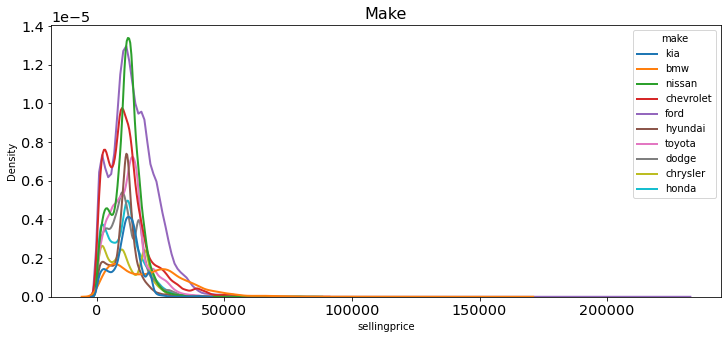

In [ ]:
df['make'] = df['make'].str.lower()
make_top = df[df['make'].isin(['ford', 'chevrolet', 'nissan', 'toyota', 'dodge', 'honda', 'hyundai', 'bmw', 'kia', 'chrysler'])]
sns.kdeplot(x = 'sellingprice', hue = 'make', data = make_top)
plt.title('Make', fontsize = 16);

#### Top 10 Used Car Sold (Model)

In [ ]:
df['model'].value_counts().iloc[:10]

altima           19349
f-150            14479
fusion           12946
camry            12549
escape           11893
focus            10399
accord            9155
3 series          8204
impala            7957
grand caravan     7941
Name: model, dtype: int64

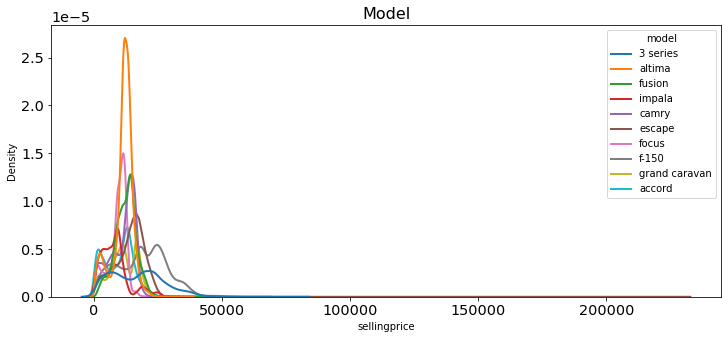

In [ ]:
df['model'] = df['model'].str.lower()
model_top = df[df['model'].isin(['altima', 'f-150', 'fusion', 'camry', 'escape', 'focus', 'accord', '3 series', 'impala', 'grand caravan'])]
sns.kdeplot(x = 'sellingprice', hue = 'model', data = model_top)
plt.title('Model', fontsize = 16);

#### Top 10 Used Car Sold (Trim)

In [ ]:
df['trim'].value_counts().iloc[:10]

Base       55817
SE         43648
LX         20757
Limited    18356
LT         16915
XLT        16741
LS         13427
LE         12903
GLS        12331
S          11883
Name: trim, dtype: int64

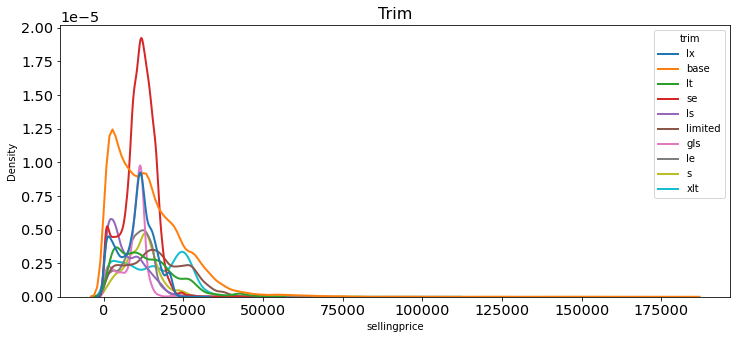

In [ ]:
df['trim'] = df['trim'].str.lower()
trim_top = df[df['trim'].isin(['base', 'se', 'lx', 'limited', 'lt', 'xlt', 'ls', 'le', 'gls', 's'])]
sns.kdeplot(x = 'sellingprice', hue = 'trim', data = trim_top)
plt.title('Trim', fontsize = 16);

#### Top 10 Used Car Sold (Trim)

In [ ]:
df['body'].value_counts().iloc[:10]

sedan          241343
suv            143844
hatchback       26237
minivan         25529
coupe           17752
crew cab        16394
wagon           16129
convertible     10476
supercrew        9033
g sedan          7417
Name: body, dtype: int64

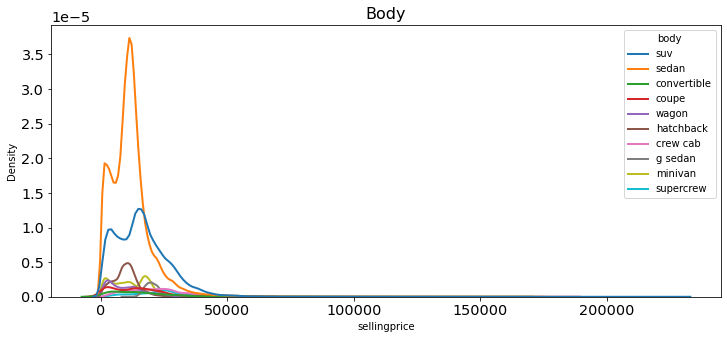

In [ ]:
df['body'] = df['body'].str.lower()
body_top = df[df['body'].isin(['sedan', 'suv', 'hatchback', 'minivan', 'coupe', 'crew cab', 'wagon', 'convertible', 'supercrew', 'g sedan'])]
sns.kdeplot(x = 'sellingprice', hue = 'body', data = body_top)
plt.title('Body', fontsize = 16);

#### Top 10 Used Car Sold (Transmission)

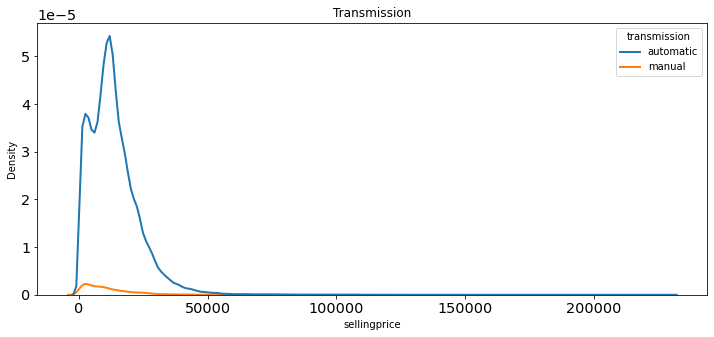

In [ ]:
sns.kdeplot(data=df, x='sellingprice', hue='transmission')
plt.title('Transmission');

In [ ]:
df['state'].value_counts().iloc[:10]

fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
Name: state, dtype: int64

#### Top 10 Used Car Sold (State)

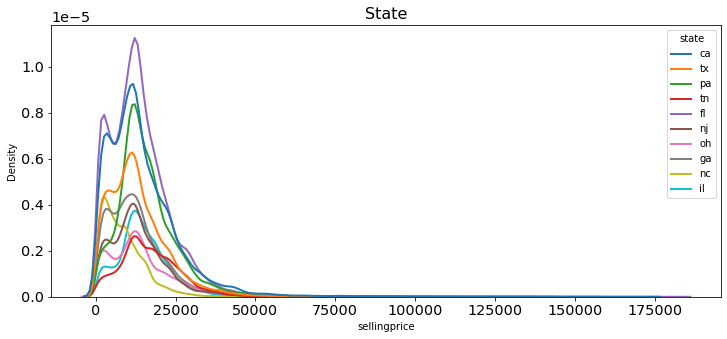

In [ ]:
df['state'] = df['state'].str.lower()
state_top = df[df['state'].isin(['fl', 'ca', 'pa', 'tx', 'ga', 'nj', 'il', 'nc', 'oh', 'tn'])]
sns.kdeplot(x = 'sellingprice', hue = 'state', data = state_top)
plt.title('State', fontsize = 16);

#### Top 10 Used Car Sold (Color)

In [ ]:
df['color'].value_counts().iloc[:10]

black     110970
white     106673
silver     83389
gray       82857
blue       51139
red        43569
—          24685
green      11382
gold       11342
beige       9222
Name: color, dtype: int64

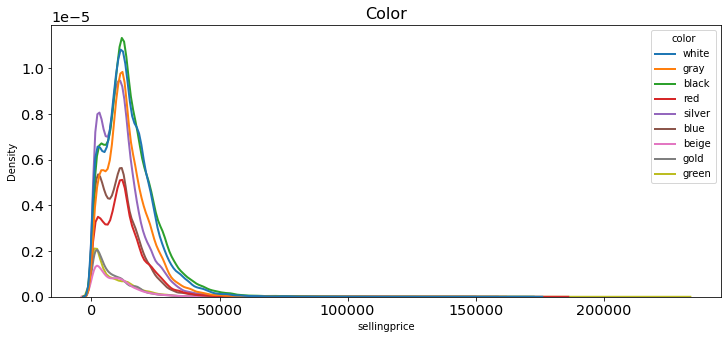

In [ ]:
df['color'] = df['color'].str.lower()
color_top = df[df['color'].isin(['black', 'white', 'silver', 'gray', 'blue', 'red', '-', 'green', 'gold', 'beige'])]
sns.kdeplot(x = 'sellingprice', hue = 'color', data = color_top)
plt.title('Color', fontsize = 16);

#### Top 10 Used Car Sold (Interior)

In [ ]:
df['interior'].value_counts().iloc[:10]

black        244325
gray         178578
beige         59758
tan           44093
—             17076
brown          8640
red            1359
blue           1138
silver         1099
off-white       480
Name: interior, dtype: int64

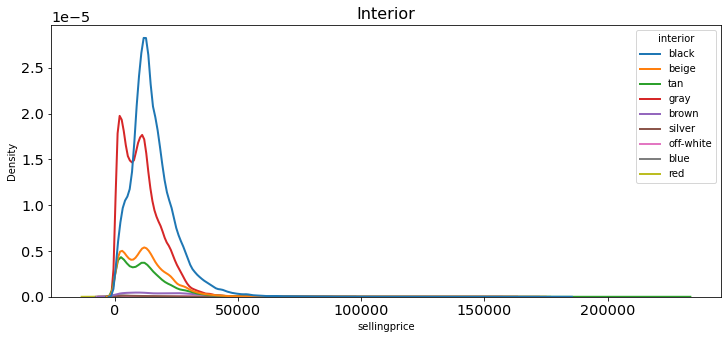

In [ ]:
df['interior'] = df['interior'].str.lower()
interior_top = df[df['interior'].isin(['black', 'gray', 'beige', 'tan', '-', 'brown', 'red', 'blue', 'silver', 'off-white'])]
sns.kdeplot(x = 'sellingprice', hue = 'interior', data = interior_top)
plt.title('Interior', fontsize = 16);

#### Top 10 Used Car Sold (Seller)

In [ ]:
df['seller'].value_counts().iloc[:10]

nissan-infiniti lt                       19693
ford motor credit company,llc            19162
the hertz corporation                    18299
santander consumer                       15285
avis corporation                         12540
nissan infiniti lt                        9962
wells fargo dealer services               8796
tdaf remarketing                          7209
enterprise veh exchange/rental            6853
ge fleet services for itself/servicer     6692
Name: seller, dtype: int64

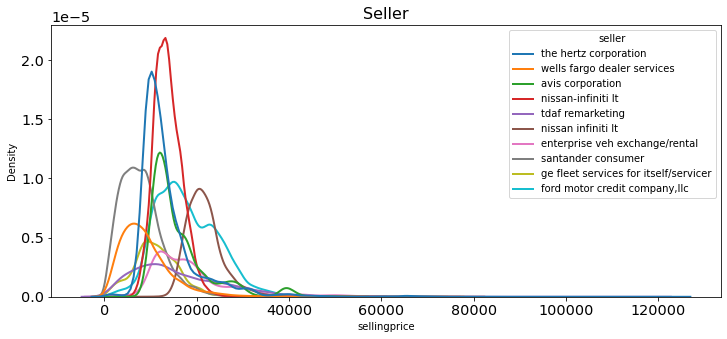

In [ ]:
df['seller'] = df['seller'].str.lower()
seller_top = df[df['seller'].isin(['nissan-infiniti lt', 'ford motor credit company,llc', 'the hertz corporation', 'santander consumer', 'avis corporation' ,'nissan infiniti lt', 'wells fargo dealer services', 'tdaf remarketing', 'enterprise veh exchange/rental', 'ge fleet services for itself/servicer'])]
sns.kdeplot(x = 'sellingprice', hue = 'seller', data = seller_top)
plt.title('Seller', fontsize = 16);

Untuk fiture `model`, `trim`, `vin`, `saledate`, `seller` tidak ditampilkan plotnya dikarenakan kardinalitasnya sangat tinggi.

Pengamatan:
- Semua kolom terkecuali `transmission` memiliki kategori yang sangat banyak, sehingga setiap kolom dikelompokkan kembali berdasarkan jumlah terbanyak (top 10) untuk mempermudah dalam melihat distribusinya,
* Kolom `vin` dan `saledate` tidak perlu dilihat korelasinya kepada `target` dikarenakan secara bisnis vin dan saledate tidak berpengaruh kepada harga sebuah mobil (`sellingprice`),
- Distribusi transmisi automatic tampaknya cenderung memiliki selling price yang lebih tinggi ketimbang transmisi manual (hal ini menunjukkan bahwa `transmission` menjadi fitur yang promising untuk digunakan dalam pemodelan),
* Sepertinya feature `make`, `body`, `interior` memiliki perbedaan jumlah yang signifikan antar kategorinya (perlu ditangani lebih lanjut dengan feature encoding),
* Sepertinya feature `state` dan `color` memiliki distribusi yang terlihat signifikan antara top 5 kategori dengan yang lainnya, namun antar kategori top 5-nya tidak memiliki perbedaan distribusi yang signifikan.

Beberapa hal yang ditemukan dari EDA dataset di atas sebagai berikut:
- Data terlihat valid dan tidak ada kecacatan yang signifikan,
- Beberapa kolom perlu ditinjau ulang di pre-processing (huruf besar/kecil dan missing values),
- Ada beberapa distribusi yang skewed atau bahkan ada distribusi dengan arah yang tidak jelas (`condition`) dan memiliki outlier,
- Beberapa fitur memiliki korelasi yang jelas, sehingga akan dipakai dalam pemodelan
- Kolom yang memiliki jumlah unique values banyak perlu dihandle lebih lanjut pada feature encoding
- Ada feature `year`, `condition`, `odometer` memiliki korelasi yang tinggi satu sama lain sehingga kemungkinan feature tersebut redundan dan perlu ada feature yang didrop
- Dari fitur kategorikal, kolom `transmission` sepertinya berguna untuk menjadi prediktor model.

## No 4. Business Insight

### Price Segmentation

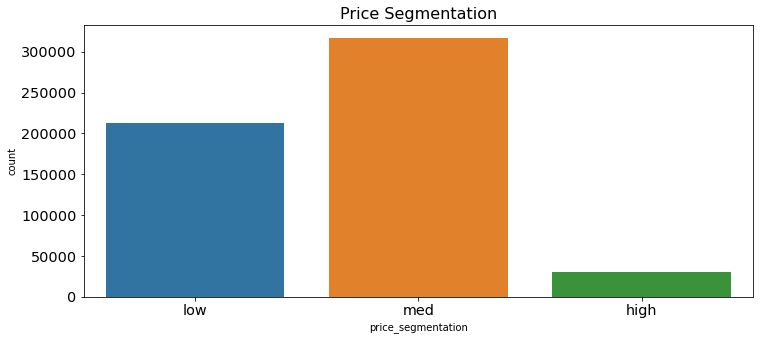

In [ ]:
df['price_segmentation'] = np.where(df['sellingprice']<10000, 'low', np.where(df['sellingprice']>30000, 'high', 'med'))
order = ['low', 'med', 'high']
plt.title('Price Segmentation', fontsize = 16)
sns.countplot(x = df['price_segmentation'], order = order);

Dari countplot berikut bisa didapatkan insight bahwa harga mobil dengan kategori medium memiliki jumlah terbanyak, sedangkan kategori high memiliki kategori yang paling sedikit.

### Transmission

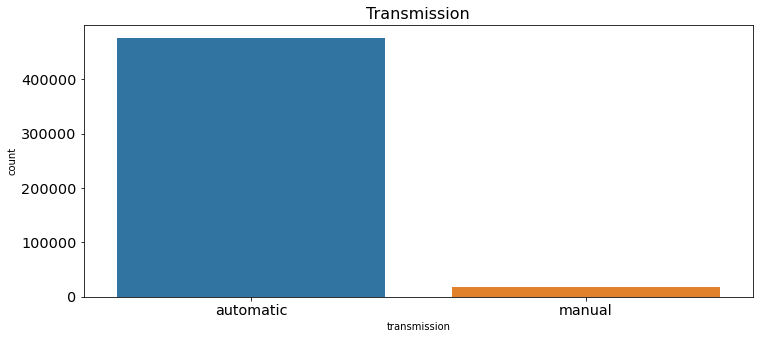

In [ ]:
sns.countplot(x = 'transmission', data = df)
plt.title('Transmission', fontsize = 16);

Dari transmission bisa dilihat bahwa mobil dari dataset tersebut adalah automatic.

# **Preprocessing**

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Project - Group 7/Colab Notebooks/car_prices.csv', error_bad_lines=False,warn_bad_lines=True)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## No. 1 Data Cleansing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


Pengamatan\:
1. Data terdiri dari 55811 baris
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris)
3. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai)

In [ ]:
df.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
494397,2013,Ford,Explorer,XLT,suv,automatic,1fm5k7d8xdga32939,fl,3.7,41469.0,black,black,onesource/kendall toyota,23400,22200,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
424123,2012,BMW,3 Series,328i,Sedan,automatic,wba3a5g5xcnp16837,ga,4.2,21087.0,brown,tan,financial services remarketing (lease),23900,23800,Wed May 27 2015 03:00:00 GMT-0700 (PDT)
231386,2006,Pontiac,G6,GT,Sedan,automatic,1g2zh558864278131,nc,2.9,111953.0,green,beige,north state acceptance,4300,5000,Mon Feb 02 2015 01:00:00 GMT-0800 (PST)
118328,2004,Volvo,S40,2.4i,Sedan,automatic,yv1ms382642015979,pa,2.2,158462.0,black,black,bobby rahal volvo jaguar land rover,1725,2400,Wed Jan 14 2015 01:00:00 GMT-0800 (PST)
248524,2013,Chevrolet,Suburban,LTZ 1500,SUV,automatic,1gnskke73dr198036,nv,2.9,62352.0,black,black,the hertz corporation,31200,30900,Fri Feb 06 2015 04:00:00 GMT-0800 (PST)


### Drop Kolom `mmr`

In [ ]:
df.drop(columns = 'mmr', inplace = True, axis = 1)

Alasan drop kolom `mmr`:
- Kolom mmr memiliki nilai median dan mean yang berbeda sehingga distribusinya skew,
- Pada correlation heatmap, bisa diamati bahwa kolom `mmr` memiliki korelasi kuat positif terhadap target `sellingprice` yaitu 0.98 
- Pada pair plot, bisa diamati bahwa kolom `mmr` memiliki korelasi linear terhadap target `sellingprice`
- MMR adalah Manheim Market Report, sebuah indikator pada harga grosir untuk menentukan harga mobil. Hal ini menunjukkan mengapa nilai MMR begitu dekat dengan selling price.

References:
https://www.autoauctionmall.com/learning-center/what-does-mmr-mean/

### Drop Kolom `state`

In [ ]:
df['price_segmentation'] = np.where(df['sellingprice']<10000, 'low', np.where(df['sellingprice']>30000, 'high', 'med'))

In [ ]:
df['state'] = df['state'].str.lower()

def state(x):
    if x['state'] == 'fl':
        state = 'fl'
    elif x['state'] == 'ca':
        state = 'ca'
    elif x['state'] == 'pa':
        state = 'pa'
    elif x['state'] == 'tx':
        state = 'tx'
    elif x['state'] == 'ga':
        state = 'ga'
    elif x['state'] == 'nj':
        state = 'nj'
    elif x['state'] == 'il':
        state = 'il'
    elif x['state'] == 'nc':
        state = 'nc'
    elif x['state'] == 'oh':
        state = 'oh'
    elif x['state'] == 'tn':
        state = 'tn'
    else:
        state = 'others'
    return state

df['state'] = df.apply(lambda x: state(x), axis=1)

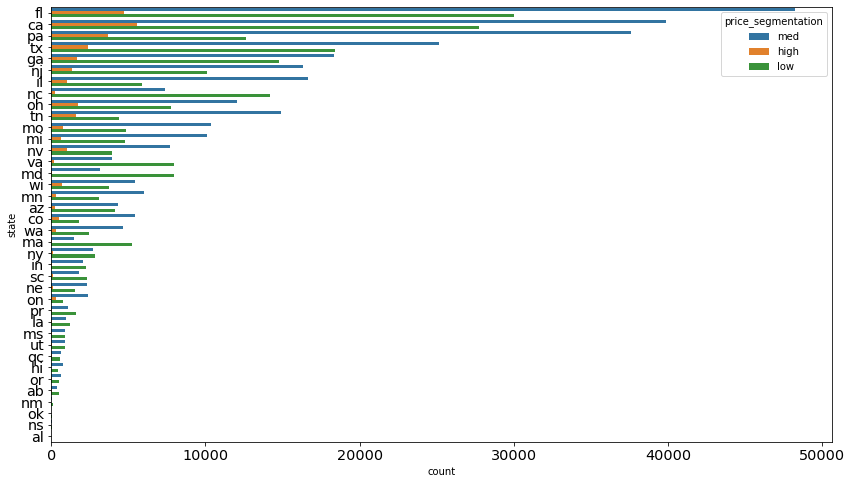

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(y='state', hue='price_segmentation', data=df, order=pd.value_counts(df['state']).index);

In [ ]:
df.drop(columns = 'state', inplace = True, axis = 1)

Alasan drop kolom `state`: 
- Persebaran rasio segmentasi harga (low/med/high) dari setiap state memiliki nilai yang sama,
- Setiap stage didominasi oleh medium, sedangkan segmentasi high menjadi yang paling sedikit. Oleh karena itu, tidak terlihat ada perbedaan yang mencolok.

References: -

### Drop Kolom `vin`

In [ ]:
df.drop(columns = 'vin', inplace = True, axis = 1)

Alasan drop kolom `vin`: 
- `vin` merupakan kode pengenal yang biasanya akan berguna pada spesifik automobil saja (tidak berlaku ke semua mobil),
- secara bisnis `vin` atau nomor identitas kendaraan tidak memiliki pengaruh terhadap target/label `sellingprice`.

References: https://www.autocheck.com/vehiclehistory/vin-basics

### Drop Kolom `interior`

In [ ]:
df.drop(columns = 'interior', inplace = True, axis = 1)

Alasan drop kolom `interior`: kolom `interior` memiliki kesamaan nilai dengan `color` sehingga diputuskan untuk drop salah satu nya. Jadi kami memilih `interior` karena berdasarkan preferensi warna body diluar dari mmobil lebih berpengaruh dibanding interior nya.

References: -

### Drop Kolom `seller`

In [ ]:
df.drop(columns = 'seller', inplace = True, axis = 1)

Alasan drop kolom `seller`: Menurut kami, perusahaan Car-a-thon tidak melihat seller, karena kami tetap akan melakukan filtering pada kendaraan berdasarkan kondisi, odometer, dll (fair value). Sehingga, siapapun sellernya bisa melakukan penjualan (tidak ada perbedaan). Kolom `seller` memiliki jumlah unique values yang sangat banyak (kardinalitas tinggi), sehingga akan menyulitkan ketika melakukan feature encoding.

References: -

## Statistical Summary

In [ ]:
nums_update = ['year', 'condition', 'odometer', 'sellingprice']
cats_update = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'saledate']

In [ ]:
df[nums_update].describe()

,year,condition,odometer,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13611.262461
std,3.966812,0.949439,53397.752933,9749.656919
min,1982.000000,1.000000,1.000000,1.000000
25%,2007.000000,2.700000,28374.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18200.000000
max,2015.000000,5.000000,999999.000000,230000.000000


Beberapa pengamatan:
Kolom `sellingprice` memiliki nilai median dan mean yang berbeda (mean > median) sehingga distribusinya skew ke kanan atau long-right tail

In [ ]:
df[cats_update].describe()

,make,model,trim,body,transmission,color,saledate
count,548510,548412,548160,545616,493458,558062,558811
unique,96,973,1975,86,2,20,3745
top,Ford,Altima,Base,Sedan,automatic,black,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,110970,5334


## A. Handle Missing Values

In [ ]:
# jumlah missing values di setiap kolom
df.isna().sum().sort_values(ascending = False)

transmission          65353
body                  13195
condition             11794
trim                  10651
model                 10399
make                  10301
color                   749
odometer                 94
year                      0
sellingprice              0
saledate                  0
price_segmentation        0
dtype: int64

In [ ]:
# persentase missing values di setiap kolom
missing_values = df.isna().sum().sort_values(ascending = False)/len(df)*100
missing_values

transmission          11.695010
body                   2.361263
condition              2.110553
trim                   1.906011
model                  1.860915
make                   1.843378
color                  0.134035
odometer               0.016821
year                   0.000000
sellingprice           0.000000
saledate               0.000000
price_segmentation     0.000000
dtype: float64

In [ ]:
missing_values[['body', 'condition', 'trim', 'model', 'make', 'color', 'odometer']].sum()

10.232976802532521

- `transmission`: impute dengan nilai modus (automatic),
- `body`, `trim`, `condition`, `color`, `odometer`, `make`, dan `model` : drop saja (karena secara total persentasenya hanya 10%),
- `year`, `seller`, `saledate`, dan `sellingprice`: tidak memiliki missing values sehingga tidak perlu dihandle.

###Dataframe Impute (`transmission`) dan Drop (`body`, `condition`, `make`, `color`, `odometer`)

In [ ]:
# drop `body`, `model`, `trim`, `condition`, `color`, `odometer`, dan `make`
df_1 = df.dropna(subset=['body', 'model', 'trim', 'condition', 'color', 'odometer', 'make'])

In [ ]:
# impute transmission dengan modus
df_1['transmission'] = df_1['transmission'].fillna(df_1['transmission'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_1.isna().sum()

year                  0
make                  0
model                 0
trim                  0
body                  0
transmission          0
condition             0
odometer              0
color                 0
sellingprice          0
saledate              0
price_segmentation    0
dtype: int64

###Dataframe Impute (`transmission`, `body`, `condition`, `make`, `color`, dan `odometer`)

In [ ]:
# impute transmission dengan modus
df_2['transmission'] = df_2['transmission'].fillna(df_2['transmission'].mode()[0])

In [ ]:
# impute body dengan modus
df_2['body'] = df_2['body'].fillna(df_2['body'].mode()[0])

In [ ]:
# impute condition dengan median
df_2['condition'] = df_2['condition'].fillna(df_2['condition'].median())

In [ ]:
# impute make dengan modus
df_2['make'] = df_2['make'].fillna(df_2['make'].mode()[0])

In [ ]:
# impute color dengan modus
df_2['color'] = df_2['color'].fillna(df_2['color'].mode()[0])

In [ ]:
# impute odometer dengan median
df_2['odometer'] = df_2['odometer'].fillna(df_2['odometer'].median())

In [ ]:
df_2.head()

,year,make,body,transmission,condition,odometer,color,sellingprice,saledate,price_segmentation
0,2015,Kia,SUV,automatic,5.0,16639.0,white,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),med
1,2015,Kia,SUV,automatic,5.0,9393.0,white,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),med
2,2014,BMW,Sedan,automatic,4.5,1331.0,gray,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),med
3,2015,Volvo,Sedan,automatic,4.1,14282.0,white,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),med
4,2014,BMW,Sedan,automatic,4.3,2641.0,gray,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),high


In [ ]:
df_2.isna().sum()

year                  0
make                  0
body                  0
transmission          0
condition             0
odometer              0
color                 0
sellingprice          0
saledate              0
price_segmentation    0
dtype: int64

## B. Handle Duplicated Data

In [ ]:
df_1.duplicated().sum()

0

Tidak ada data yang duplikat pada dataset.

Kolom make (brand)

In [ ]:
df_1['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Buick', 'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Geo', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [ ]:
len(df_1['make'].unique())

53

In [ ]:
df_1['make'] = df_1['make'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
len(df_1['make'].unique())

53

In [ ]:
# Feature Encoding untuk mengubah data categori menjadi numerik
# Ubah data make menjadi angka
# Sebelum mengubah, ambil dulu top make
# Menghitung jumlah mobil yang terjual berdasarkan make
df_1
df_1['make'].value_counts().iloc[:10]

ford         91908
chevrolet    58817
nissan       53085
toyota       38991
dodge        30102
honda        26373
hyundai      21474
bmw          20140
kia          17870
chrysler     16916
Name: make, dtype: int64

In [ ]:
# Ubah nama make menjadi others jika tidak termasuk 10 besar penjualan
def make_top10list(x):
  if x['make'] == 'ford':
    make_top10list = 'ford'
  elif x['make'] == 'chevrolet':
    make_top10list = 'chevrolet'
  elif x['make'] == 'nissan':
    make_top10list = 'nissan'
  elif x['make'] == 'toyota':
    make_top10list = 'toyota'
  elif x['make'] == 'dodge':
    make_top10list = 'dodge'
  elif x['make'] == 'honda':
    make_top10list = 'honda'
  elif x['make'] == 'hyundai':
    make_top10list = 'hyundai'
  elif x['make'] == 'bmw':
    make_top10list = 'bmw'
  elif x['make'] == 'kia':
    make_top10list = 'kia'
  elif x['make'] == 'chrysler':
    make_top10list = 'chrysler'
  else:
    make_top10list = 'others'
  return make_top10list

In [ ]:
df_1['top_10_make'] = df_1.apply(lambda x: make_top10list(x), axis=1)
df_1.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,make,model,trim,body,transmission,condition,odometer,color,sellingprice,saledate,price_segmentation,top_10_make
0,2015,kia,Sorento,LX,SUV,automatic,5.0,16639.0,white,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),med,kia
1,2015,kia,Sorento,LX,SUV,automatic,5.0,9393.0,white,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),med,kia
2,2014,bmw,3 Series,328i SULEV,Sedan,automatic,4.5,1331.0,gray,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),med,bmw
3,2015,volvo,S60,T5,Sedan,automatic,4.1,14282.0,white,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),med,others
4,2014,bmw,6 Series Gran Coupe,650i,Sedan,automatic,4.3,2641.0,gray,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),high,bmw


Kolom body

In [ ]:
df_1['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'suv',
       'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crewmax c

In [ ]:
len(df_1['body'].unique())

86

In [ ]:
df_1['body'] = df_1['body'].str.lower()
len(df_1['body'].unique())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


45

In [ ]:
body_list=[]

for index,kolom in df_1.iterrows():
  body=kolom['body']
  if body.endswith('cab')==True:
    bodies= 'cab'
  elif body.startswith('cab')==True:
    bodies= 'cab'
  elif body.endswith('coupe')==True:
    bodies= 'coupe'
  elif body.endswith('koup')==True:
    bodies= 'coupe'
  elif body.endswith('van')==True:
    bodies= 'van'
  elif body.endswith('wagon')==True:
    bodies= 'wagon'
  elif body.endswith('convertible')==True:
    bodies= 'convertible'
  elif body.endswith('suv')==True:
    bodies= 'suv'
  elif body.endswith('sedan')==True:
    bodies= 'sedan'
  elif body.endswith('hatchback')==True:
    bodies= 'hatchback'
  else:
    bodies='others'
  body_list.append(bodies)

df_1['body']=body_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_1['body'].value_counts().iloc[:10]

sedan          243857
suv            140531
cab             37399
van             31242
hatchback       25737
coupe           19655
wagon           15729
convertible     10636
others           8874
Name: body, dtype: int64

In [ ]:
df_1.loc[df_1['sellingprice']==1]

,year,make,model,trim,body,transmission,condition,odometer,color,sellingprice,saledate,price_segmentation,top_10_make
48453,2003,mercedes-benz,E-Class,E500,sedan,automatic,2.1,1.0,black,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST),low,others
293223,2014,ford,E-Series Van,E-250,van,automatic,4.1,31886.0,white,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST),low,ford
348252,1995,isuzu,Rodeo,LS,suv,automatic,1.0,254132.0,red,1,Wed Mar 04 2015 01:05:00 GMT-0800 (PST),low,others


In [ ]:
df_1['model'].unique()
df_1['model'] = df_1['model'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_1['model'].value_counts(ascending = False).iloc[:10]

altima           19159
f-150            14164
fusion           12836
camry            12326
escape           11714
focus            10230
accord            8865
3 series          8019
grand caravan     7840
impala            7775
Name: model, dtype: int64

In [ ]:
# Ubah nama make menjadi others jika tidak termasuk 10 besar penjualan
def top_10_model(x):
  if x['model'] == 'altima':
    model_top10list = 'altima'
  elif x['model'] == 'f-150':
    model_top10list = 'f-150'
  elif x['model'] == 'fusion':
    model_top10list = 'fusion'
  elif x['model'] == 'camry':
    model_top10list = 'camry'
  elif x['model'] == 'escape':
    model_top10list = 'escape'
  elif x['model'] == 'focus':
    model_top10list = 'focus'
  elif x['model'] == 'accord':
    model_top10list = 'accord'
  elif x['model'] == '3 series':
    model_top10list = '3 series'
  elif x['model'] == 'impala':
    model_top10list = 'impala'
  elif x['model'] == 'grand caravan':
    model_top10list = 'grand caravan'
  else:
    model_top10list = 'others'
  return model_top10list

In [ ]:
df_1['top_10_model'] = df_1.apply(lambda x: top_10_model(x), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_1 = df_1[ ~(df_1['sellingprice'] == 1) ]
#Terdapat 3 data yang memiliki nilai sellingprice weird, maka bisa di drop

In [ ]:
df_1.describe()

,year,condition,odometer,sellingprice
count,533657.000000,533657.000000,533657.000000,533657.000000
mean,2010.231180,3.435999,66253.314554,13860.040564
std,3.828378,0.945510,52092.622015,9673.454348
min,1990.000000,1.000000,1.000000,100.000000
25%,2008.000000,2.700000,27747.000000,7300.000000
50%,2012.000000,3.600000,50145.000000,12400.000000
75%,2013.000000,4.200000,95813.000000,18400.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [ ]:
df_1.sort_values(by='sellingprice')

,year,make,model,trim,body,transmission,condition,odometer,color,sellingprice,saledate,price_segmentation,top_10_make,top_10_model
502064,2002,ford,taurus,SES,sedan,automatic,1.9,132230.0,silver,100,Fri Jun 05 2015 02:00:00 GMT-0700 (PDT),low,ford,others
406428,2005,hyundai,elantra,GLS,sedan,automatic,1.0,999999.0,white,100,Thu Apr 02 2015 05:02:00 GMT-0700 (PDT),low,hyundai,others
196184,2004,pontiac,montana,Base,van,automatic,2.0,106495.0,silver,100,Wed Jan 28 2015 06:30:00 GMT-0800 (PST),low,others,others
466132,2006,buick,rendezvous,CX,suv,automatic,1.0,256040.0,silver,100,Thu May 28 2015 05:01:00 GMT-0700 (PDT),low,others,others
421784,2002,dodge,durango,SLT,suv,automatic,1.9,145161.0,silver,100,Thu May 14 2015 03:00:00 GMT-0700 (PDT),low,dodge,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125095,2012,rolls-royce,ghost,Base,sedan,automatic,4.5,14316.0,black,169500,Wed Jan 14 2015 01:40:00 GMT-0800 (PST),high,others,others
545500,2013,rolls-royce,ghost,Base,sedan,automatic,4.2,7852.0,white,171500,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT),high,others,others
446941,2015,mercedes-benz,s-class,S65 AMG,sedan,automatic,4.1,5277.0,white,173000,Thu May 21 2015 05:00:00 GMT-0700 (PDT),high,others,others
548146,2011,ferrari,458 italia,Base,coupe,automatic,4.6,12116.0,red,183000,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT),high,others,others


## C. Handle Outliers

### Menggunakan Z-Score

In [ ]:
from scipy import stats

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_1)}')

filtered_entries = np.array([True] * len(df_1))

for col in ['sellingprice', 'odometer']:
    zscore = abs(stats.zscore(df_1[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_1_zscore = df_1[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_1_zscore)}')

Jumlah baris sebelum memfilter outlier: 533657
Jumlah baris setelah memfilter outlier: 521715


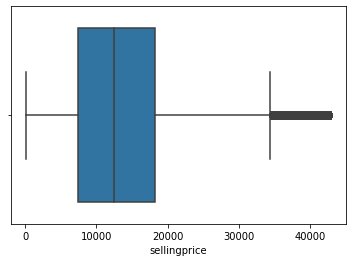

In [ ]:
sns.boxplot(x=df_1_zscore['sellingprice']);

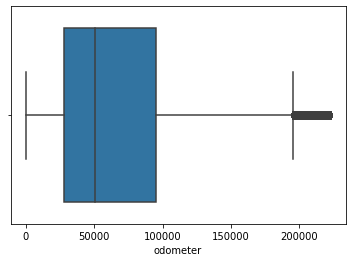

In [ ]:
sns.boxplot(x=df_1_zscore['odometer']);

### Menggunakan IQR

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_1)}')

filtered_entries = np.array([True] * len(df_1))
for col in ['odometer', 'sellingprice']:
    Q1 = df_1[col].quantile(0.25)
    Q3 = df_1[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_1[col] >= low_limit) & (df_1[col] <= high_limit)) & filtered_entries
    
df_1_iqr = df_1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_1_iqr)}')

Jumlah baris sebelum memfilter outlier: 533657
Jumlah baris setelah memfilter outlier: 506993


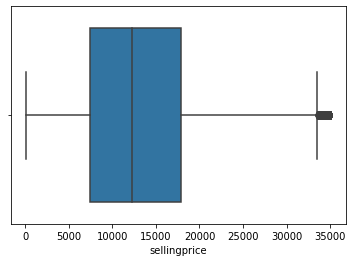

In [ ]:
sns.boxplot(x=df_1_iqr['sellingprice']);

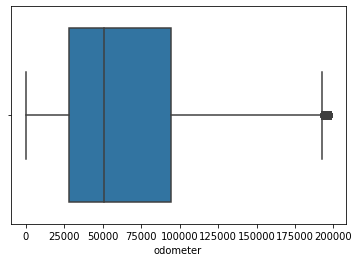

In [ ]:
sns.boxplot(x=df_1_iqr['odometer']);

## D. Feature Transformation

In [ ]:
df_1.describe()

,year,condition,odometer,sellingprice
count,533657.000000,533657.000000,533657.000000,533657.000000
mean,2010.231180,3.435999,66253.314554,13860.040564
std,3.828378,0.945510,52092.622015,9673.454348
min,1990.000000,1.000000,1.000000,100.000000
25%,2008.000000,2.700000,27747.000000,7300.000000
50%,2012.000000,3.600000,50145.000000,12400.000000
75%,2013.000000,4.200000,95813.000000,18400.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# year kita re-scale ke [0,1]
df_1['year_norm'] = MinMaxScaler().fit_transform(df_1['year'].values.reshape(len(df_1), 1))
df_1['odometer_norm'] = MinMaxScaler().fit_transform(df_1['odometer'].values.reshape(len(df_1), 1))

# sellingprice dan condition menggunakan standarisasi (distribusinya sudah mendekati normal)
df_1['sellingprice_std'] = StandardScaler().fit_transform(df_1['sellingprice'].values.reshape(len(df_1), 1))
df_1['condition_std'] = StandardScaler().fit_transform(df_1['condition'].values.reshape(len(df_1), 1))

In [ ]:
df_1.describe()

,year,condition,odometer,sellingprice,year_norm,odometer_norm,sellingprice_std,condition_std
count,533657.000000,533657.000000,533657.000000,533657.000000,533657.000000,533657.000000,5.336570e+05,5.336570e+05
mean,2010.231180,3.435999,66253.314554,13860.040564,0.809247,0.066252,-1.543225e-15,-2.457338e-14
std,3.828378,0.945510,52092.622015,9673.454348,0.153135,0.052093,1.000001e+00,1.000001e+00
min,1990.000000,1.000000,1.000000,100.000000,0.000000,0.000000,-1.422455e+00,-2.576389e+00
25%,2008.000000,2.700000,27747.000000,7300.000000,0.720000,0.027746,-6.781493e-01,-7.784152e-01
50%,2012.000000,3.600000,50145.000000,12400.000000,0.880000,0.050144,-1.509328e-01,1.734530e-01
75%,2013.000000,4.200000,95813.000000,18400.000000,0.920000,0.095812,4.693219e-01,8.080319e-01
max,2015.000000,5.000000,999999.000000,230000.000000,1.000000,1.000000,2.234364e+01,1.654137e+00


## E. Feature Encoding

In [ ]:
cats_update

['make', 'model', 'trim', 'body', 'transmission', 'color', 'saledate']

In [ ]:
for col in cats_update:
  print(f'value counts of column {col}')
  print(df_1[col].value_counts())
  print('---'*10, '\n')

value counts of column make
ford             91907
chevrolet        58817
nissan           53085
toyota           38991
dodge            30102
honda            26373
hyundai          21474
bmw              20140
kia              17870
chrysler         16916
mercedes-benz    16630
infiniti         15168
jeep             15013
volkswagen       12171
lexus            11670
gmc              10317
mazda             8171
cadillac          7250
acura             5736
audi              5720
lincoln           5611
subaru            4935
buick             4928
ram               4545
pontiac           4244
mitsubishi        4029
volvo             3628
mini              3167
saturn            2656
mercury           1889
land rover        1708
scion             1647
jaguar            1377
porsche           1361
suzuki            1026
fiat               857
hummer             786
saab               453
smart              389
oldsmobile         333
isuzu              187
maserati           131
bentle

Strategi encoding:
- `transmission`, `make`, `model`, `trim`, `body`, `color`: label encoding

### Mapping `transmission`

In [ ]:
mapping_transmission = {
    'manual' : 0,
    'automatic' : 1
}
df_1['transmission'] = df_1['transmission'].map(mapping_transmission)

### Mapping `top_10_make`

In [ ]:
df_1['top_10_make'].value_counts(ascending = False).iloc[:10]

others       157982
ford          91907
chevrolet     58817
nissan        53085
toyota        38991
dodge         30102
honda         26373
hyundai       21474
bmw           20140
kia           17870
Name: top_10_make, dtype: int64

In [ ]:
mapping_make = {
    'kia': 0,
    'bmw': 1,
    'hyundai': 2,
    'honda': 3,
    'dodge': 4,
    'toyota': 5,
    'nissan': 6,
    'chevrolet': 7,
    'ford': 8,
    'others': 9
}
df_1['make'] = df_1['make'].map(mapping_make)

### Mapping `body`

In [ ]:
df_1['body'].value_counts(ascending = False)

sedan          243856
suv            140530
cab             37399
van             31241
hatchback       25737
coupe           19655
wagon           15729
convertible     10636
others           8874
Name: body, dtype: int64

In [ ]:
mapping_body = {
    'others': 0,
    'convertible': 1,
    'wagon': 2,
    'coupe': 3,
    'hatchback': 4,
    'van': 5,
    'cab': 6,
    'suv': 7,
    'sedan': 8
}
df_1['body'] = df_1['body'].map(mapping_body)

### Mapping `top_10_color`

In [ ]:
df_1['color'].value_counts(ascending = False).iloc[:10]

black     106599
white     101836
gray       80004
silver     79518
blue       48533
red        41634
—          24371
gold       10471
green      10361
beige       8591
Name: color, dtype: int64

In [ ]:
# Ubah nama color menjadi others jika tidak termasuk 10 besar
def top_10_color(x):
  if x['color'] == 'black':
    top_10_color = 'black'
  elif x['color'] == 'white':
    top_10_color = 'white'
  elif x['color'] == 'gray':
    top_10_color = 'gray'
  elif x['color'] == 'silver':
    top_10_color = 'silver'
  elif x['color'] == 'blue':
    top_10_color = 'blue'
  elif x['color'] == 'red':
    top_10_color = 'red'
  elif x['color'] == 'gold':
    top_10_color = 'gold'
  elif x['color'] == 'green':
    top_10_color = 'green'
  elif x['color'] == 'beige':
    top_10_color = 'beige'
  else:
    top_10_color = 'others'
  return top_10_color

df_1['top_10_color'] = df_1.apply(lambda x: top_10_color(x), axis=1)

In [ ]:
df_1['top_10_color'].value_counts(ascending = False)

black     106599
white     101836
gray       80004
silver     79518
blue       48533
others     46110
red        41634
gold       10471
green      10361
beige       8591
Name: top_10_color, dtype: int64

In [ ]:
mapping_color = {
    'beige': 0,
    'green': 1,
    'gold': 2,
    'red': 3,
    'others': 4,
    'blue': 5,
    'silver': 6,
    'gray': 7,
    'white': 8,
    'black': 9
}

df_1['color']  = df_1['top_10_color'].map(mapping_color)

### Mapping `top_10_model`

In [ ]:
df_1['top_10_model'].value_counts(ascending = False).iloc[:10]

others           420729
altima            19159
f-150             14164
fusion            12836
camry             12326
escape            11714
focus             10230
accord             8865
3 series           8019
grand caravan      7840
Name: top_10_model, dtype: int64

In [ ]:
mapping_model = {
    'grand caravan': 0,
    '3 series': 1,
    'accord': 2,
    'focus': 3,
    'escape': 4,
    'camry': 5,
    'fusion': 6,
    'f-150': 7,
    'altima': 8,
    'others': 9
}
df_1['model'] = df_1['top_10_model'].map(mapping_model)

### Mapping `top_10_trim`

In [ ]:
df_1['trim'].value_counts(ascending = False).iloc[:10]

Base       54094
SE         43024
LX         20367
Limited    17969
LT         16640
XLT        16357
LS         12972
LE         12692
GLS        12175
S          11719
Name: trim, dtype: int64

In [ ]:
# Ubah nama trim menjadi others jika tidak termasuk 10 besar
def top_10_trim(x):
  if x['trim'] == 'Base':
    top_10_trim = 'Base'
  elif x['trim'] == 'SE':
    top_10_trim = 'SE'
  elif x['trim'] == 'LX':
    top_10_trim = 'LX'
  elif x['trim'] == 'Limited':
    top_10_trim = 'Limited'
  elif x['trim'] == 'LT':
    top_10_trim = 'LT'
  elif x['trim'] == 'XLT':
    top_10_trim = 'XLT'
  elif x['trim'] == 'LS':
    top_10_trim = 'LS'
  elif x['trim'] == 'LE':
    top_10_trim = 'LE'
  elif x['trim'] == 'GLS':
    top_10_trim = 'GLS'
  else:
    top_10_trim = 'others'
  return top_10_trim

df_1['top_10_trim'] = df_1.apply(lambda x: top_10_trim(x), axis=1)

In [ ]:
df_1['top_10_trim'].value_counts(ascending = False)

others     327367
Base        54094
SE          43024
LX          20367
Limited     17969
LT          16640
XLT         16357
LS          12972
LE          12692
GLS         12175
Name: top_10_trim, dtype: int64

In [ ]:
mapping_trim = {
    'GLS': 0,
    'LE': 1,
    'LS': 2,
    'XLT': 3,
    'LT': 4,
    'Limited': 5,
    'LX': 6,
    'SE': 7,
    'Base': 8,
    'others': 9
}

df_1['trim'] = df_1['top_10_trim'].map(mapping_trim)

In [ ]:
df_1.head(2)

,year,make,model,trim,body,transmission,condition,odometer,color,sellingprice,saledate,price_segmentation,top_10_make,top_10_model,year_norm,odometer_norm,sellingprice_std,condition_std,top_10_color,top_10_trim
0,2015,0.0,9.0,6,7,1,5.0,16639.0,8,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),med,kia,others,1.0,0.016638,0.789787,1.654137,white,LX
1,2015,0.0,9.0,6,7,1,5.0,9393.0,8,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),med,kia,others,1.0,0.009392,0.789787,1.654137,white,LX


## F. Handle Class Imbalance

Tidak perlu handle class imbalance karena dataset kami memiliki target `sellingprice` berupa regresi. Dalam penentuan harga mobil maka data merupakan continuous variables sehingga tidak akan imbalance.

## No. 2 Feature Engineering

## A. Feature Selection

- Kolom `mmr`, `state`, `vin`, dan `interior` dilakukan drop.

## B. Feature Extraction

In [ ]:
df_1.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'sellingprice', 'saledate', 'price_segmentation',
       'top_10_make', 'top_10_model', 'year_norm', 'odometer_norm',
       'sellingprice_std', 'condition_std', 'top_10_color', 'top_10_trim'],
      dtype='object')

- Kolom feature extraction antara lain `price_segmentation`, `top_10_make`, `top_10_model`, `year_norm`, `odometer_norm`, `sellingprice_std`, `condition_std`, `top_10_color`, `top_10_trim`.

## C. Feature Tambahan

Kolom feature tambahan yang bisa menjadi feature antara lain:
- Fuel
- Accident History
- Dealership's Reputation
- Vehicle Tax
- Car Assurance

Reference: https://www.autoremarketing.com/trends/features-info-used-car-buyers-want-most